<h1>UK 2019 General Election</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("HoC-GE2019-results-by-constituency-csv.csv")

In [4]:
print(df.head())

      ons_id ons_region_id   constituency_name     county_name region_name  \
0  W07000049     W92000004            Aberavon  West Glamorgan       Wales   
1  W07000058     W92000004           Aberconwy           Clwyd       Wales   
2  S14000001     S92000003      Aberdeen North        Scotland    Scotland   
3  S14000002     S92000003      Aberdeen South        Scotland    Scotland   
4  S14000003     S92000003  Airdrie and Shotts        Scotland    Scotland   

  country_name constituency_type     declaration_time mp_firstname mp_surname  \
0        Wales            County  2019-12-13 02:30:00      Stephen    Kinnock   
1        Wales            County  2019-12-13 03:09:00        Robin     Millar   
2     Scotland           Borough  2019-12-13 03:13:00       Kirsty   Blackman   
3     Scotland           Borough  2019-12-13 03:34:00      Stephen      Flynn   
4     Scotland            County  2019-12-13 02:59:00         Neil       Gray   

   ... green    snp    pc dup  sf  sdlp  uup

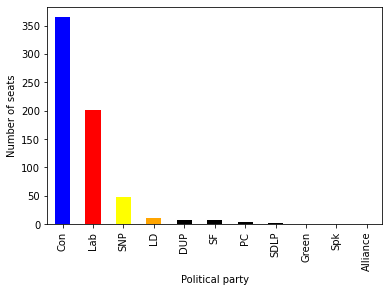

In [5]:
x = df['first_party'].value_counts()

x.plot.bar(color=['blue','red','yellow','orange','black','black','black','black','black','black'])
plt.xlabel('Political party')
plt.ylabel('Number of seats')
plt.show()

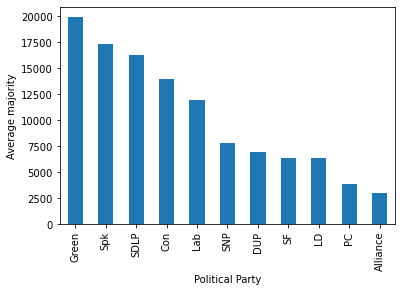

In [6]:
x = df.groupby('first_party').mean()['majority'].sort_values(ascending=False)
x.plot.bar()

plt.xlabel('Political Party')
plt.ylabel('Average majority')
plt.show()

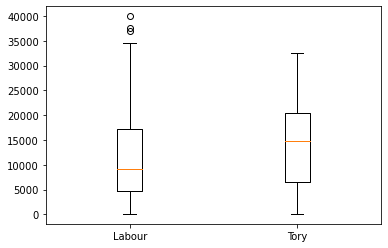

In [7]:
labour_majorities = df[df['first_party'] == 'Lab']['majority']
tory_majorities = df[df['first_party'] == 'Con']['majority']

plt.boxplot([labour_majorities, tory_majorities], labels=['Labour','Tory'])
plt.show()

<h3>Extreme Labour Majorities</h3>

In [8]:
extreme_labour_majorities = df[(df['first_party'] == 'Lab') & (df['majority'] > 35000)]
print(extreme_labour_majorities)

        ons_id ons_region_id      constituency_name county_name region_name  \
41   E14000555     E12000007  Bethnal Green and Bow      London      London   
315  E14000775     E12000002               Knowsley  Merseyside  North West   
336  E14000793     E12000002   Liverpool, Riverside  Merseyside  North West   

    country_name constituency_type     declaration_time mp_firstname  \
41       England           Borough  2019-12-13 04:26:00    Rushanara   
315      England           Borough  2019-12-13 01:46:00       George   
336      England           Borough  2019-12-13 02:34:00          Kim   

    mp_surname  ... green snp pc dup  sf  sdlp  uup  alliance  other  \
41         Ali  ...  2570   0  0   0   0     0    0         0    439   
315    Howarth  ...  1262   0  0   0   0     0    0         0    405   
336    Johnson  ...  3017   0  0   0   0     0    0         0      0   

     other_winner  
41              0  
315             0  
336             0  

[3 rows x 32 columns]


<h3>How did turnout affect results?</h3>

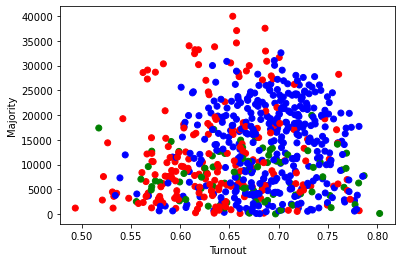

In [9]:
X = df['valid_votes']/df['electorate']
y = df['majority']
colors = np.where(df['first_party'] == 'Lab', 'red', np.where(df['first_party'] == 'Con', 'blue', 'green'))
plt.scatter(X,y, color=colors)
plt.xlabel('Turnout')
plt.ylabel('Majority')
plt.show()

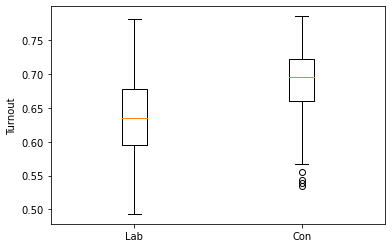

In [10]:
X_lab = X[df['first_party']=='Lab']
X_con = X[df['first_party']=='Con']

plt.boxplot([X_lab, X_con], labels=['Lab','Con'])
plt.ylabel('Turnout')
plt.show()

<h1>COVID Data</h1>

In [11]:
import requests

url = 'https://api.coronavirus.data.gov.uk/v1/data'
params = '?filters=areaType=utla&structure={"areaName":"areaName","date":"date","cumCasesBySpecimenDateRate":"cumCasesBySpecimenDateRate","cumDeaths28DaysByDeathDateRate":"cumDeaths28DaysByDeathDateRate"}'

res = requests.get(url+params)
max_pages = int(res.json()['pagination']['last'].split('page=')[1])

In [12]:
covid_df = pd.DataFrame()
for x in range(1,max_pages+1):
    print(x)
    url = 'https://api.coronavirus.data.gov.uk/v1/data'
    params = '?page='+str(x)+'&format=csv&filters=areaType=utla&structure={"areaName":"areaName","date":"date","cumCasesBySpecimenDateRate":"cumCasesBySpecimenDateRate","cumDeaths28DaysByDeathDateRate":"cumDeaths28DaysByDeathDateRate"}'

    part_covid_df = pd.read_csv(url+params)
    covid_df = covid_df.append(part_covid_df, ignore_index=True)
display(covid_df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


areaName        date  cumCasesBySpecimenDateRate  \
0      Aberdeen City  2020-11-06                       926.2   
1      Aberdeen City  2020-11-05                       925.8   
2      Aberdeen City  2020-11-04                       923.6   
3      Aberdeen City  2020-11-03                       917.9   
4      Aberdeen City  2020-11-02                       914.4   
...              ...         ...                         ...   
53923           York  2020-02-03                         0.5   
53924           York  2020-02-02                         0.5   
53925           York  2020-02-01                         0.5   
53926           York  2020-01-31                         0.5   
53927           York  2020-01-30                         0.5   

       cumDeaths28DaysByDeathDateRate  
0                                38.5  
1                                38.5  
2                                38.5  
3                                38.5  
4                                38.0  
...                               ...  
53923                             NaN  
53924                             NaN  
53925                             NaN  
53926                             NaN  
53927                             NaN  

[53928 rows x 4 columns]

In [13]:
covid_df = covid_df.fillna(0)
print(covid_df.describe())

       cumCasesBySpecimenDateRate  cumDeaths28DaysByDeathDateRate
count                53928.000000                    53928.000000
mean                   466.227285                       23.392488
std                    487.985926                       31.965107
min                      0.000000                        0.000000
25%                    192.100000                        0.000000
50%                    374.500000                        0.000000
75%                    569.925000                       47.500000
max                   5068.300000                      184.100000


In [14]:
grouped_stats = covid_df.groupby('areaName').mean()

In [15]:
print(grouped_stats)

                         cumCasesBySpecimenDateRate  \
areaName                                              
Aberdeen City                            375.879447   
Aberdeenshire                            182.184190   
Angus                                    358.911858   
Antrim and Newtownabbey                  389.619476   
Ards and North Down                      274.374725   
...                                             ...   
Wokingham                                326.877559   
Wolverhampton                            584.040081   
Worcestershire                           408.402881   
Wrexham                                  753.025984   
York                                     430.607801   

                         cumDeaths28DaysByDeathDateRate  
areaName                                                 
Aberdeen City                                 25.706324  
Aberdeenshire                                 17.427668  
Angus                                         29.944

<h1>Geo Lookup</h1>

In [16]:
lookup_df = pd.read_csv('/Users/sol/Documents/Data Science/COVID/Ward_to_Westminster_Parliamentary_Constituency_to_Local_Authority_District_to_Upper_Tier_Local_Authority_(December_2019)_Lookup_in_the_United_Kingdom.csv')

In [17]:
print(len(lookup_df['LAD19NM'].unique()))

382


In [18]:
merged_df = pd.merge(grouped_stats,lookup_df[['UTLA19NM','WD19NM','LAD19NM']],how='left', left_on='areaName', right_on='UTLA19NM')
display(merged_df)

cumCasesBySpecimenDateRate  cumDeaths28DaysByDeathDateRate  \
0                     375.879447                       25.706324   
1                     375.879447                       25.706324   
2                     375.879447                       25.706324   
3                     375.879447                       25.706324   
4                     375.879447                       25.706324   
...                          ...                             ...   
7797                  430.607801                       10.167021   
7798                  430.607801                       10.167021   
7799                  430.607801                       10.167021   
7800                  430.607801                       10.167021   
7801                  430.607801                       10.167021   

           UTLA19NM                              WD19NM        LAD19NM  
0     Aberdeen City            Dyce/Bucksburn/Danestone  Aberdeen City  
1     Aberdeen City                       Bridge of Don  Aberdeen City  
2     Aberdeen City  Kingswells/Sheddocksley/Summerhill  Aberdeen City  
3     Aberdeen City           Northfield/Mastrick North  Aberdeen City  
4     Aberdeen City         Hilton/Woodside/Stockethill  Aberdeen City  
...             ...                                 ...            ...  
7797           York                Osbaldwick & Derwent           York  
7798           York         Rawcliffe & Clifton Without           York  
7799           York                     Rural West York           York  
7800           York                           Strensall           York  
7801           York                           Wheldrake           York  

[7802 rows x 5 columns]

In [19]:
# Has is worked?
lookup_col = pd.DataFrame(lookup_df[['UTLA19NM','LAD19NM']].sort_values('UTLA19NM'))
covid_col = pd.DataFrame(covid_df['areaName'].unique())

In [20]:
merged_election_df = pd.merge(merged_df, df, left_on='LAD19NM', right_on='constituency_name')

print(merged_election_df['first_party'])

0       SNP
1       SNP
2       SNP
3       SNP
4       SNP
       ... 
2770    Con
2771    Con
2772    Con
2773    Con
2774    Con
Name: first_party, Length: 2775, dtype: object


2775


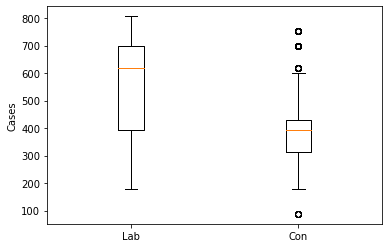

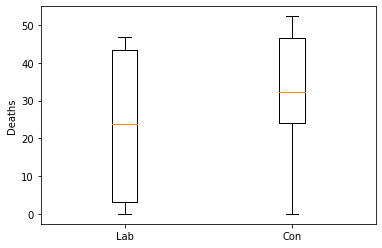

In [21]:
lab_merged_df = merged_election_df[merged_election_df['first_party'] == 'Lab']
con_merged_df = merged_election_df[merged_election_df['first_party'] == 'Con']
print(len(merged_election_df))

plt.boxplot([lab_merged_df['cumCasesBySpecimenDateRate'], con_merged_df['cumCasesBySpecimenDateRate']], labels=['Lab','Con'])
plt.ylabel('Cases')
plt.show()

plt.boxplot([lab_merged_df['cumDeaths28DaysByDeathDateRate'], con_merged_df['cumDeaths28DaysByDeathDateRate']], labels=['Lab','Con'])
plt.ylabel('Deaths')
plt.show()